In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df= pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test= pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#Extract Test Passenger ID
pass_id = pd.DataFrame(test['PassengerId'])

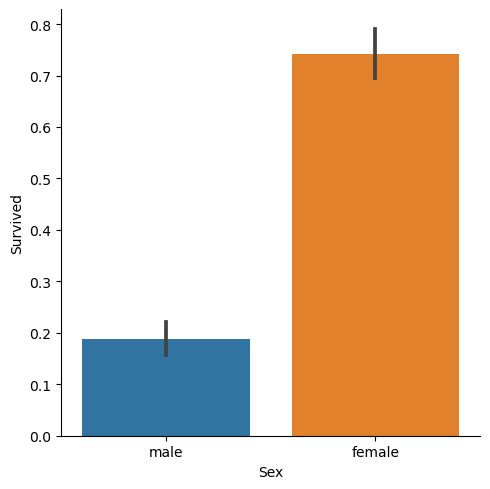

In [4]:
#Sex, females were most likely to survive
sns.catplot(data= df, x= "Sex", y= "Survived", kind= "bar")
plt.show()

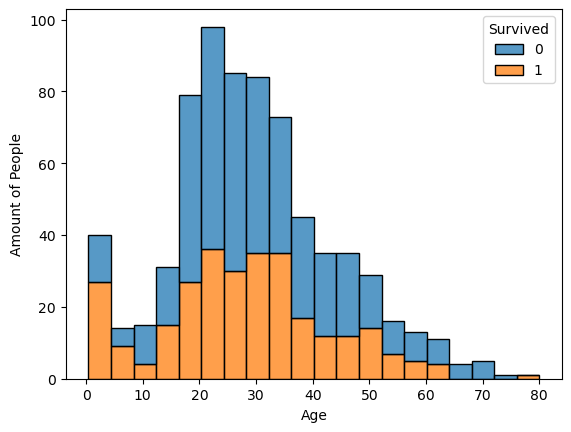

In [5]:
#Age People of older age survived
sns.histplot(data=df, x= "Age", hue= "Survived", multiple= "stack")
plt.ylabel("Amount of People")
plt.show()

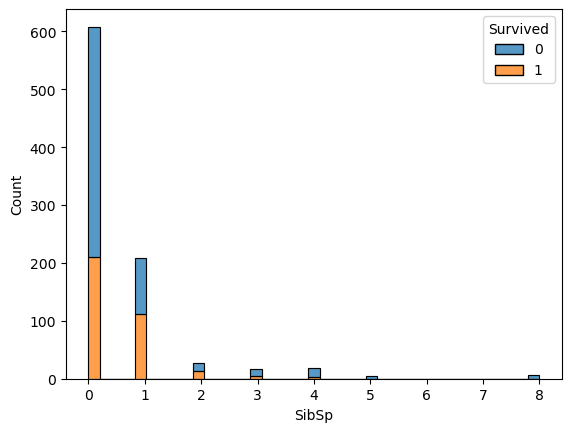

In [6]:
#Siblings/Spouses SibSp
sns.histplot(data=df, x= "SibSp", hue= "Survived", multiple= "stack")
plt.show()

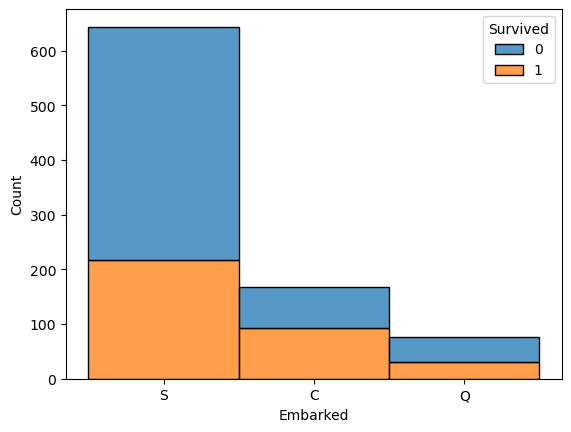

In [7]:
sns.histplot(data=df, x= "Embarked", hue= "Survived", multiple= "stack")
plt.show()

In [8]:
#Check For Duplicates

sum(df.duplicated()==False)



891

In [9]:
#Check for Nas
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Age, cabin, and embarked has a lot of null values, have to drop cabin because there are 687 missing rows

mean_age= np.mean(df["Age"])
df['Age'] = df['Age'].fillna(mean_age)

test_age= np.mean(test["Age"])
test['Age']= test['Age'].fillna(test_age)

In [11]:
test_fare= np.mean(test["Fare"])
test['Fare']= test['Fare'].fillna(test_fare)

In [12]:
#Sanity check
sum(pd.isnull(df['Age']))


0

In [13]:
#List out All Embarked Values and impute missing 2 with nominal imputing

df["Embarked"].value_counts()

df["Embarked"] = df["Embarked"].fillna("S")

test["Embarked"] = test["Embarked"].fillna("S")



In [14]:
#Sanity Check
df["Embarked"].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#Change Sex to 0 and 1

df= pd.get_dummies(df, columns= ['Sex'])

test= pd.get_dummies(test, columns= ['Sex'])


In [16]:
#Change Embarked to Numerical Variable

df= pd.get_dummies(df, columns= ['Embarked'])
test= pd.get_dummies(test, columns= ['Embarked'])

In [17]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742


In [18]:
df = df.drop(columns= ["PassengerId", "Name", "Cabin", "Ticket"],)
test= test.drop(columns= ["PassengerId", "Name", "Cabin", "Ticket"],)

In [19]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


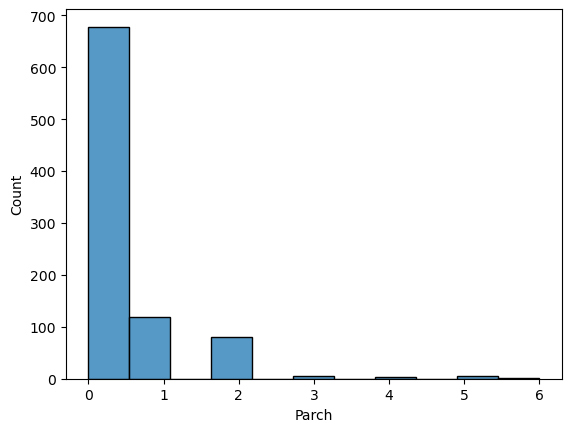

In [20]:
#Parch Number of Parents/Children Aboard

df["Parch"].value_counts()

sns.histplot(df["Parch"])
plt.show()

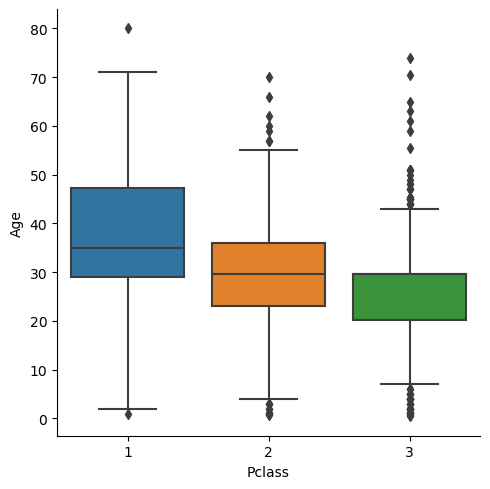

In [21]:
#Pclass represents class of the ticket
sns.catplot(data= df, x= 'Pclass', y= 'Age', kind= 'box')
plt.show()

In [22]:
#Get Names of all columns
names =list(df.columns.values.tolist())
#names

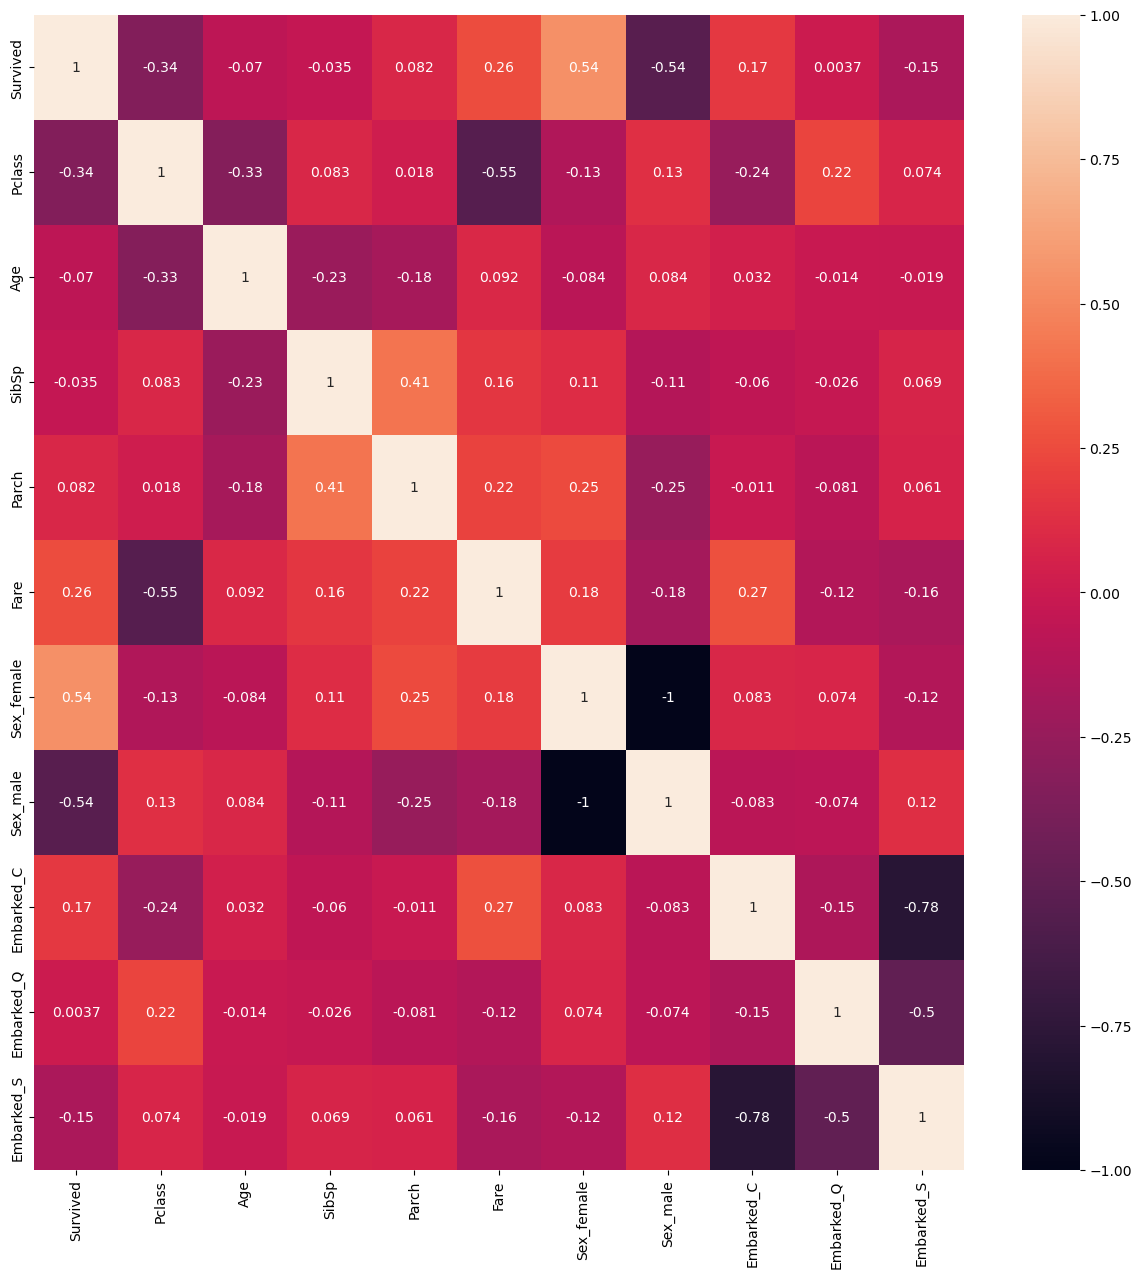

In [23]:
#Run Correlation Matrix to See Which Variables we want to use

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot= True)
plt.show()



In [24]:
X= df.iloc[:, df.columns !="Survived"]
y= df.iloc[:, df.columns == "Survived"]


In [25]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [26]:
#Define Models 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

def log_model(X_train, X_test, y_train, y_test):
    log = LogisticRegression(max_iter=1000).fit(X_train, y_train.values.ravel())
    log_model= log.predict(X_test)
    return log_model

log_model(X_train, X_test, y_train, y_test)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [27]:
#Define Models 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

def tree_model(X_train, X_test, y_train, y_test):
    tree = DecisionTreeClassifier()
    tree= tree.fit(X_train, y_train)
    tree_model= tree.predict(X_test)
    accuracy= accuracy_score(y_test, tree_model)
    return accuracy

tree_model(X_train, X_test, y_train, y_test)

0.7597765363128491

In [28]:
tree = DecisionTreeClassifier()
tree= tree.fit(X_train, y_train)
y_pred= tree.predict(test)

In [29]:
#Cross Validation or Grid Search
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix

#Generate New Decision Tree with optimal parameters from Grid Search
final_tree= DecisionTreeClassifier()
parameters= {'max_depth': [1,3,5,7,9],'criterion':['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random']}
grid = GridSearchCV(final_tree, param_grid = parameters,scoring = 'recall')
grid= grid.fit(X_train, y_train)
grid_y_pred = grid.predict(X_test)



In [30]:
grid_accuracy= accuracy_score(y_test, grid_y_pred)
grid_accuracy

0.8268156424581006

In [31]:
grid_y_pred = grid.predict(test)

In [32]:
#Prediction with Original Model

def save_preds(_fn, _y_pred, _df):
     import csv
     with open(_fn, 'w') as fout:
         writer = csv.writer(fout, delimiter=',', lineterminator='\n')
         writer.writerow(['Survived', 'PassengerId'])
         for y, passengerId in zip(_y_pred, _df['PassengerId']):
             writer.writerow([y, passengerId])
 
save_preds('predictions_chris.csv', y_pred, pass_id)

In [33]:
# Prediction with Grid Model after fine tuning some parameters
def save_preds(_fn, _y_pred, _df):
     import csv
     with open(_fn, 'w') as fout:
         writer = csv.writer(fout, delimiter=',', lineterminator='\n')
         writer.writerow(['Survived', 'PassengerId'])
         for y, passengerId in zip(_y_pred, _df['PassengerId']):
             writer.writerow([y, passengerId])
 
save_preds('predictions_chris.csv', grid_y_pred, pass_id)

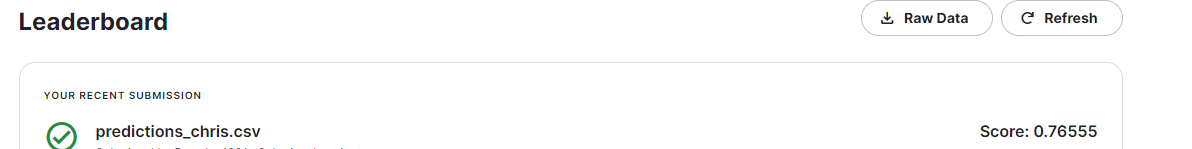